In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Batiscafo

Si vuole progettare un veicolo per immersioni in profondità, sul modello del batiscafo "Trieste" che nel 1960 discese alla profondità record di 10911 metri.

<center>
<img src="assets/trieste.png" width=60%/>
</center>

Un batiscafo è costituito da tre componenti principali: una cabina, un galleggiante ed una zavorra. Ci focalizzeremo sulla progettazione del galleggiante, che assumeremo essere di forma sferica. Il batiscafo affonda finché la zavorra è presente ed inizia a risalire quando questa viene rilasciata.

Sul veicolo agiscono tre forze principali: quella di gravità, quella di galleggiamento e quella di trascinamento (attrito con l’acqua). Poiché non ci occupiamo della progettazione della cabina e della zavorra, per queste due componenti l’effetto della forza di galleggiamento può essere incorporato in quello della forza di gravità. Assumendo un asse y orientato verso l’alto, quest’ultima è data da:

$$
F_g = - g (m_s + m_b + m_f)
$$

Dove $g$ è l’accelerazione di gravità, $m_f$ è la massa del galleggiante, mentre $m_b$ e $m_s$ sono le masse equivalenti (i.e. che incorporano l’effetto del galleggiamento) della zavorra e della cabina. La massa del galleggiante può essere calcolata a partire dal suo volume con:

$$
m_f = \rho_f V_f \quad \text{ con: } V_f = \frac{4}{3}\pi r^3
$$

Dove $V_f$ è il volume del galleggiante, $r$ è il suo raggio e $\rho_f$ è la sua densità. La forza di
galleggiamento è invece data da:

$$
F_b = g \rho_w V_f
$$

Dove $\rho_w$ è la densità dell’acqua. La forza di trascinamento, infine, è data da:

$$
F_t = - \frac{1}{2} \rho_w C_d S_f v |v| \quad \text{ con: } S_f = \pi r^2
$$

Dove $v$ è la velocità di discesa, $C_d$ è un coefficiente di trascinamento e $S_f$ è la superficie del galleggiante.

## Esercizio 1

**La velocità di discesa si stabilizza su un valore terminale quando le tre forze si annullano, ossia quando:**

$$
F_g + F_b + F_t = 0
$$

Si può sfruttare l'uguaglianza per dimensionare il galleggiante in modo tale da ottenre una data velocità terminale. Ciò richiede di risolvere una equazione nella forma:

$$
F(r) = F_g(r) + F_b(r) + F_t(r) = 0
$$

In cui tutti i parametri sono noti (inclusa la velocità terminale desiderata) ed il raggio $r$ del galleggiante è da determinare.

**Nel modulo `sol.trieste` definire la funzione**

```python
def force_balance(r):
    # Parametri fissi
    rhof = 979 # Densita' del galleggiante
    rhow = 1000 # Densita' dell'acqua
    Cd = 0.62 # Coefficiente di trascinamento
    ms = 8000 # Massa equivalente della cabina in acqua
    mb = 9000 - 1143 # Massa equivalente della zavorra in acqua
    g = 9.81 # Accelerazione di gravita' (costante, per semplicita')
    vf = -0.9 # Velocita' di discesa desiderata
    ...
```

* La funzione deve calcolare e restituire il valore di $F(r)$
* Diversi parametri (inclusa la velocità terminale desiderata) saranno considerati fissi nell'esercizio


**Nel modulo `sol.trieste` si definisca quindi la funzione:**

```python
def find_r():
    a, b = 1, 10
    ...
```

* La funzione deve risolvere l'equazione non lineare $F(r) = 0$
* Per la soluzione, si utilizzi il metododo `scipy.optimize.brentq`, con gli estermi indicati
* La funzione deve restituire il valore del raggio che permette di raggiungere la velocità terminale desiderata

Si collaudi la funzione nella cella seguente.

In [2]:
from sol import trieste

r_sol = trieste.find_r()
print(f'Valore del raggio: {r_sol} m')

Valore del raggio: 5.360122469906808 m


## Esercizio 2

**L’andamento della posizione (i.e. della profondità) e della velocità del batiscafo è caratterizzato dall'equazione differenziale ordinaria:**

$$\begin{align}
\dot{x} &= v \\
\dot{v} &= \frac{1}{m_s + m_b + m_f} (F_g + F_b + F_t)
\end{align}$$

**Nel modulo `sol.trieste` definire la funzione**

```python
def dstate(X, t):
    # Parametri fissi
    rhof = 979 # Densita' del galleggiante
    rhow = 1000 # Densita' dell'acqua
    Cd = 0.62 # Coefficiente di trascinamento
    ms = 8000 # Massa equivalente della cabina in acqua
    mb = 9000 - 1143 # Massa equivalente della zavorra in acqua
    g = 9.81 # Accelerazione di gravita' (costante, per semplicita')
    r = 5.3 # Raggio del galleggiante
    ...
```

* La funzione deve calcolare le espressioni che definiscono l'ODE
* Diversi parametri (come indicato) saranno considerati fissi nell'esercizio
* La funzione deve restituire un array `numpy` con le due componenti della derivata


**Nel modulo `sol.trieste` si definisca quindi la funzione:**

```python
def simulate():
    v0 = 0
    x0 = 0
    X0 = [x0, v0]
    t = np.linspace(0, 300, 300 * 10)
    ...
```

* La funzione deve risolvere un problema ai valori iniziali
* ...Con lo stato iniziale ed il vettore dei tempi indicati
* Il metodo deve restituire
  - La matrice con gli stati visitati
  - Il vettore dei tempi visitati

Si collaudi la funzione nella cella seguente. Per verificare la correttezza dei risultati, può essere utile disegnare l'andamento dello stato usando la funzione `plot_state_evolution` nel modulo `base.util` incluso nel tema d'esame.

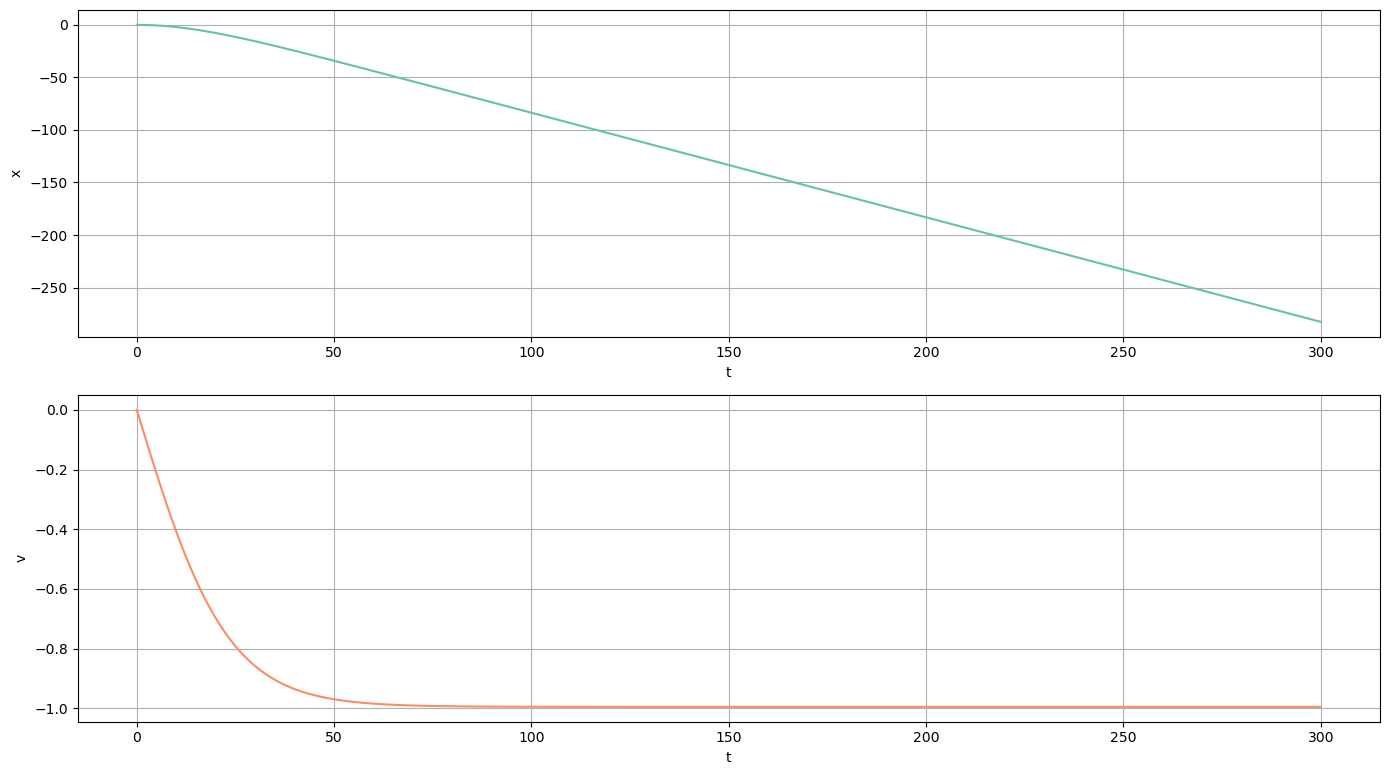

In [6]:
from base import util

X, t = trieste.simulate()

util.plot_state_evolution(X, t, xlabel='t', ylabels=['x', 'v'], figsize=(14, 8))

## Esercizio 3

**Sia $x(t)$ il valore della quota del batiscafo al tempo $t$. Dato un valore di quota $x^*$ di interesse, è possibile determinare per quale valore di tempo venga raggiunto risolvendo:**

$$
F_2(t) = x(t) - x^* = 0
$$

Il valore di $t$ che azzera la funzione rappresenta la soluzione.

**Nel modulo `sol.trieste` si definisca la funzione**

```python
def find_t250_aux(t):
    ...
```

* La funzione deve calcolare il valore della funzione $F_2(t)$ indicata sopra, per $x^* = -250$
* Si consideri come riferimento il problema ai valori iniziale risolto nell'esercizio 1

**Nel modulo `sol.meteor` si definisca la funzione**

```python
def find_t250():
    a, b = 0, 60 * 60
    ...
```

* La funzione deve determinare per quale tempo la funzione $F_2(t)$ si azzera
* Per la soluzione dell'equazione, si utilizzi il metodo `scipy.optimize.brentq` con gli estremi indicati
* La funzione deve restituire il valore del tempo che risolve l'equazione

In [5]:
tsol = trieste.find_t250()
print(f'Tempo per cui il batiscafo raggiunge 300m di profondità: {tsol} s')

Tempo per cui il batiscafo raggiunge 300m di profondità: 267.1941838950607 s
